# Social Media Mental Health Indicators - Data Analysis Project

## Phase 1: Data Preparation & Understanding

**Project Objective:**
Analyze the relationship between social media usage, screen-time behavior, and mental health indicators to identify patterns and build predictive models.

**Dataset:** Social Media Mental Health Indicators Dataset

**Author:** [Bahaa Mohammed Elkady]
**Date:** November 27, 2025

---

### Table of Contents
1. Import Libraries
2. Load Dataset
3. Initial Data Exploration
4. Data Cleaning
5. Feature Engineering
6. Save Cleaned Data

## 1. Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway

# Machine Learning (for later phases)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Load Dataset

Load the dataset and display basic information about its structure.

In [4]:
# Load the dataset
# Update the file path according to your file location
Social = pd.read_csv('/media/pharmacy/Data/Pharmacy_Projects/Data_Projects/Social Media Mental Health Indicators Dataset/Datasets/mental_health_social_media_dataset.csv')
print("✅ Dataset loaded successfully!")
print(f"\n📊 Dataset Shape: {Social.shape[0]} rows × {Social.shape[1]} columns")
Social

✅ Dataset loaded successfully!

📊 Dataset Shape: 5000 rows × 15 columns


,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.40,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.70,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.20,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.00,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.10,22,3,7,6,Stressed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Sai Menon,42,1/21/2025,Female,WhatsApp,254,64,0,1,7.70,35,1,5,7,At_Risk
4996,Neha Ansari,33,1/26/2025,Female,TikTok,330,214,1,2,7.40,27,3,7,6,Stressed
4997,Aarav Sharma,13,2/6/2025,Male,TikTok,403,262,2,2,7.00,20,4,9,4,Stressed
4998,Aadhya Patil,21,2/17/2025,Male,TikTok,476,309,2,3,6.60,12,4,9,4,Stressed


## 3. Initial Data Exploration

### 3.1 First Look at the Data

In [5]:
# Display first few rows
print("=" * 100)
print("FIRST 10 ROWS OF THE DATASET")
print("=" * 100)
display(Social.head(10))

FIRST 10 ROWS OF THE DATASET


,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.40,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.70,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.20,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.00,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.10,22,3,7,6,Stressed
5,Myra Kale,25,2/8/2024,Female,Snapchat,516,284,1,3,6.40,8,3,8,5,Stressed
6,Ananya Kulkarni,29,2/19/2024,Other,Snapchat,328,180,1,2,7.40,27,3,7,6,Stressed
7,Meera Das,28,1/11/2024,Female,Facebook,394,138,1,1,7.00,21,2,7,6,Stressed
8,Vihaan Naidu,31,1/22/2024,Male,Facebook,326,114,0,1,7.40,27,2,6,6,Stressed
9,Meera Patil,26,2/2/2024,Female,Facebook,339,119,0,1,7.30,26,2,6,6,Stressed


In [7]:
# Display last few rows
print("=" * 100)
print("LAST 10 ROWS OF THE DATASET")
print("=" * 100)
display(Social.tail(10))

LAST 10 ROWS OF THE DATASET


,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
4990,Navya Gupta,34,1/22/2025,Male,Snapchat,394,217,1,2,7.00,21,3,8,5,Stressed
4991,Suhani Menon,30,2/2/2025,Male,Snapchat,326,179,1,2,7.40,27,3,7,6,Stressed
4992,Aditi Iyer,30,2/13/2025,Male,Snapchat,339,186,1,2,7.30,26,3,7,6,Stressed
4993,Meera Das,24,2/24/2025,Female,Snapchat,472,260,1,2,6.60,13,3,8,5,Stressed
4994,Aarohi Patel,23,1/16/2025,Female,Facebook,457,160,1,1,6.70,14,2,7,6,Stressed
4995,Sai Menon,42,1/21/2025,Female,WhatsApp,254,64,0,1,7.70,35,1,5,7,At_Risk
4996,Neha Ansari,33,1/26/2025,Female,TikTok,330,214,1,2,7.40,27,3,7,6,Stressed
4997,Aarav Sharma,13,2/6/2025,Male,TikTok,403,262,2,2,7.00,20,4,9,4,Stressed
4998,Aadhya Patil,21,2/17/2025,Male,TikTok,476,309,2,3,6.60,12,4,9,4,Stressed
4999,Shaurya Das,42,2/28/2025,Female,TikTok,249,162,1,1,7.80,35,2,6,6,Stressed


### 3.2 Dataset Information

In [9]:
# Get dataset info
print("=" * 100)
print("DATASET INFORMATION")
print("=" * 100)
print(Social.info())

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null   int64  
 13

In [10]:
# Get column names
print("=" * 100)
print("COLUMN NAMES")
print("=" * 100)
print(f"\nTotal Columns: {len(Social.columns)}\n")
for idx, col in enumerate(Social.columns, 1):
    print(f"{idx:2d}. {col}")

COLUMN NAMES

Total Columns: 15

 1. person_name
 2. age
 3. date
 4. gender
 5. platform
 6. daily_screen_time_min
 7. social_media_time_min
 8. negative_interactions_count
 9. positive_interactions_count
10. sleep_hours
11. physical_activity_min
12. anxiety_level
13. stress_level
14. mood_level
15. mental_state


In [11]:
# Data types summary
print("=" * 100)
print("DATA TYPES SUMMARY")
print("=" * 100)
print(Social.dtypes.value_counts())

DATA TYPES SUMMARY
int64      9
object     5
float64    1
Name: count, dtype: int64


### 3.3 Statistical Summary

In [17]:
# Statistical summary for numerical columns
print("=" * 100)
print("STATISTICAL SUMMARY - NUMERICAL COLUMNS")
print("=" * 100)
display(Social.describe().T.style.background_gradient(cmap='coolwarm').format('{:.2f}'))

STATISTICAL SUMMARY - NUMERICAL COLUMNS


,count,mean,std,min,25%,50%,75%,max
age,5000.00,29.95,12.28,13.00,21.00,27.00,35.25,69.00
daily_screen_time_min,5000.00,373.06,106.00,140.00,310.00,388.00,461.00,520.00
social_media_time_min,5000.00,175.33,71.21,35.00,118.00,170.00,231.00,338.00
negative_interactions_count,5000.00,0.86,0.56,0.00,1.00,1.00,1.00,2.00
positive_interactions_count,5000.00,1.84,0.94,0.00,1.00,2.00,2.00,4.00
sleep_hours,5000.00,7.13,0.53,6.40,6.70,7.10,7.45,8.30
physical_activity_min,5000.00,22.69,10.60,8.00,14.00,21.00,29.00,46.00
anxiety_level,5000.00,2.51,0.79,1.00,2.00,3.00,3.00,4.00
stress_level,5000.00,7.11,1.06,5.00,6.00,7.00,8.00,9.00
mood_level,5000.00,5.63,0.76,4.00,5.00,6.00,6.00,7.00


In [19]:
# Statistical summary for categorical columns
print("=" * 100)
print("STATISTICAL SUMMARY - CATEGORICAL COLUMNS")
print("=" * 100)
display(Social.describe(include=['object']).T)

STATISTICAL SUMMARY - CATEGORICAL COLUMNS


,count,unique,top,freq
person_name,5000,891,Navya Chauhan,14
date,5000,686,10/30/2025,12
gender,5000,3,Female,2474
platform,5000,7,Facebook,744
mental_state,5000,3,Stressed,4601


### 3.4 Missing Values Analysis

In [20]:
# Check for missing values
print("=" * 100)
print("MISSING VALUES ANALYSIS")
print("=" * 100)

missing_values = Social.isnull().sum()
missing_percentage = (Social.isnull().sum() / len(Social)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("✅ No missing values found in the dataset!")

MISSING VALUES ANALYSIS
✅ No missing values found in the dataset!


In [22]:
# Visualize missing values
if Social.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    sns.heatmap(Social.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values to visualize!")

✅ No missing values to visualize!


### 3.5 Duplicate Records Check

In [23]:
# Check for duplicates
print("=" * 100)
print("DUPLICATE RECORDS CHECK")
print("=" * 100)

duplicate_count = Social.duplicated().sum()
print(f"\n📊 Total Duplicate Rows: {duplicate_count}")

if duplicate_count > 0:
    print(f"⚠️  Found {duplicate_count} duplicate rows")
    print("\nSample duplicate rows:")
    print(Social[Social.duplicated(keep=False)].head(10))
else:
    print("✅ No duplicate rows found!")

DUPLICATE RECORDS CHECK

📊 Total Duplicate Rows: 0
✅ No duplicate rows found!


### 3.6 Unique Values in Categorical Columns

In [24]:
# Get unique values for categorical columns
print("=" * 100)
print("UNIQUE VALUES IN CATEGORICAL COLUMNS")
print("=" * 100)

categorical_cols = Social.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_count = Social[col].nunique()
    print(f"\n📌 {col}: {unique_count} unique values")
    print(f"   Values: {Social[col].unique()}")

UNIQUE VALUES IN CATEGORICAL COLUMNS

📌 person_name: 891 unique values
   Values: ['Reyansh Ghosh' 'Neha Patel' 'Ananya Naidu' 'Neha Das' 'Reyansh Banerjee'
 'Myra Kale' 'Ananya Kulkarni' 'Meera Das' 'Vihaan Naidu' 'Meera Patil'
 'Suhani Das' 'Vivaan Shetty' 'Diya Saxena' 'Sai Verma' 'Aditi Das'
 'Aarav Pawar' 'Avni Rathod' 'Neha Pawar' 'Anika Nair' 'Pooja Roy'
 'Shaurya Rawat' 'Aditi Mishra' 'Saanvi Saxena' 'Payal Patel'
 'Payal Ansari' 'Diya Kale' 'Navya Menon' 'Aditya Iyer' 'Myra Joshi'
 'Sonal Choudhary' 'Reyansh Khan' 'Vihaan Menon' 'Aditi Yadav'
 'Aarohi Banerjee' 'Ishaan Banerjee' 'Sonal Verma' 'Navya Rawat'
 'Saanvi Rawat' 'Reyansh Pawar' 'Neha Naidu' 'Saanvi Patil' 'Jiya Nair'
 'Vihaan Khan' 'Krishna Reddy' 'Vivaan Saxena' 'Sai Rathod'
 'Shaurya Reddy' 'Suhani Chauhan' 'Diya Verma' 'Shaurya Saxena'
 'Vihaan Yadav' 'Isha Patel' 'Krishna Yadav' 'Kavya Rawat' 'Anika Saxena'
 'Krishna Das' 'Isha Deshmukh' 'Aarohi Patel' 'Sonal Shetty' 'Avni Menon'
 'Aditi Rawat' 'Aditi Deshmukh' '

In [28]:
# Value counts for key categorical columns
print("=" * 100)
print("VALUE COUNTS - KEY CATEGORICAL COLUMNS")
print("=" * 100)

key_categorical = ['Platform', 'Gender', 'Mental_state']

for col in key_categorical:
    if col in Social.columns:
        print(f"\n{'='*50}")
        print(f"{col}")
        print(f"{'='*50}")
        print(Social[col].value_counts())
        print(f"\nPercentage Distribution:")
        print(Social[col].value_counts(normalize=True) * 100)

VALUE COUNTS - KEY CATEGORICAL COLUMNS


## 4. Data Cleaning

### 4.1 Handle Missing Values

In [29]:
# Create a copy for cleaning
Social_clean = Social.copy()

print("=" * 100)
print("DATA CLEANING PROCESS")
print("=" * 100)

# If there are missing values, handle them appropriately
# For this dataset, we'll check and handle if any exist

initial_shape = Social_clean.shape
print(f"\n📊 Initial Shape: {initial_shape}")

# Example: Drop rows with missing values (if any)
# Social_clean = Social_clean.dropna()

# Or fill with appropriate values
# Social_clean['Sleep_hours'].fillna(Social_clean['Sleep_hours'].median(), inplace=True)

print(f"✅ Missing values handled (if any)")
print(f"📊 Current Shape: {Social_clean.shape}")

DATA CLEANING PROCESS

📊 Initial Shape: (5000, 15)
✅ Missing values handled (if any)
📊 Current Shape: (5000, 15)


### 4.2 Remove Duplicates

In [31]:
# Remove duplicates
initial_rows = Social.shape[0]
Social = Social.drop_duplicates()
final_rows = Social.shape[0]

removed_rows = initial_rows - final_rows

print(f"\n🗑️  Removed {removed_rows} duplicate rows")
print(f"📊 Final Shape: {Social.shape}")


🗑️  Removed 0 duplicate rows
📊 Final Shape: (5000, 15)


### 4.3 Data Type Corrections & Validation

In [32]:
# Convert Date column to datetime
if 'Date' in Social.columns:
    Social['Date'] = pd.to_datetime(Social['Date'])
    print("✅ Date column converted to datetime format")

# Validate numerical ranges
print("\n" + "=" * 100)
print("DATA VALIDATION")
print("=" * 100)

# Check for negative values in columns that should be positive
numerical_positive_cols = ['Daily_screen_time', 'Social_media_time', 'Sleep_hours', 
                           'Physical_activity', 'Age']

for col in numerical_positive_cols:
    if col in Social.columns:
        negative_count = (Social[col] < 0).sum()
        if negative_count > 0:
            print(f"⚠️  {col}: Found {negative_count} negative values")
        else:
            print(f"✅ {col}: All values are valid (>= 0)")

# Check Sleep_hours range (should be 0-24)
if 'Sleep_hours' in Social.columns:
    invalid_sleep = ((Social['Sleep_hours'] < 0) | (Social['Sleep_hours'] > 24)).sum()
    if invalid_sleep > 0:
        print(f"\n⚠️  Sleep_hours: Found {invalid_sleep} values outside 0-24 range")
    else:
        print(f"\n✅ Sleep_hours: All values are within valid range (0-24)")

print("\n✅ Data validation completed!")


DATA VALIDATION

✅ Data validation completed!


In [39]:
# Check the actual column names in your dataset
print("=" * 100)
print("ACTUAL COLUMN NAMES IN YOUR DATASET")
print("=" * 100)
print("\nColumn names:")
for idx, col in enumerate(Social_clean.columns, 1):
    print(f"{idx:2d}. {col}")

ACTUAL COLUMN NAMES IN YOUR DATASET

Column names:
 1. person_name
 2. age
 3. date
 4. gender
 5. platform
 6. daily_screen_time_min
 7. social_media_time_min
 8. negative_interactions_count
 9. positive_interactions_count
10. sleep_hours
11. physical_activity_min
12. anxiety_level
13. stress_level
14. mood_level
15. mental_state


## 5. Feature Engineering

Creating new features to enhance our analysis and modeling capabilities.

In [40]:
print("=" * 100)
print("FEATURE ENGINEERING")
print("=" * 100)

# 1. Interaction Sentiment Score
Social_clean['interaction_sentiment_score'] = (
    Social_clean['positive_interactions_count'] - Social_clean['negative_interactions_count']
)
print("✅ Created: interaction_sentiment_score")

# 2. Screen to Social Ratio
Social_clean['screen_to_social_ratio'] = (
    Social_clean['social_media_time_min'] / Social_clean['daily_screen_time_min']
).round(2)
print("✅ Created: screen_to_social_ratio")

# 3. Total Interactions
Social_clean['total_interactions'] = (
    Social_clean['positive_interactions_count'] + Social_clean['negative_interactions_count']
)
print("✅ Created: total_interactions")

# 4. Positive Interaction Rate
Social_clean['positive_interaction_rate'] = (
    Social_clean['positive_interactions_count'] / Social_clean['total_interactions']
).round(2)
Social_clean['positive_interaction_rate'].fillna(0, inplace=True)
print("✅ Created: positive_interaction_rate")

# 5. Sleep Category
def categorize_sleep(hours):
    if hours < 6:
        return 'Poor'
    elif hours < 7:
        return 'Moderate'
    elif hours <= 9:
        return 'Good'
    else:
        return 'Excessive'

Social_clean['sleep_category'] = Social_clean['sleep_hours'].apply(categorize_sleep)
print("✅ Created: sleep_category")

# 6. Age Group
def categorize_age(age):
    if age < 20:
        return 'Teen'
    elif age < 36:
        return 'Young Adult'
    elif age < 56:
        return 'Adult'
    else:
        return 'Senior'

Social_clean['age_group'] = Social_clean['age'].apply(categorize_age)
print("✅ Created: age_group")

# 7. Usage Category (based on daily screen time)
def categorize_usage(minutes):
    if minutes < 180:  # Less than 3 hours
        return 'Light'
    elif minutes < 360:  # 3-6 hours
        return 'Moderate'
    else:  # More than 6 hours
        return 'Heavy'

Social_clean['usage_category'] = Social_clean['daily_screen_time_min'].apply(categorize_usage)
print("✅ Created: usage_category")

# 8. Mental Health Score (composite score)
# Normalize stress, anxiety (inverse), mood to 0-10 scale
Social_clean['mental_health_score'] = (
    (10 - Social_clean['stress_level']) * 0.3 +
    (10 - Social_clean['anxiety_level']) * 0.3 +
    Social_clean['mood_level'] * 0.4
).round(2)
print("✅ Created: mental_health_score")

# 9. Activity Level Category
def categorize_activity(minutes):
    if minutes < 20:
        return 'Sedentary'
    elif minutes < 40:
        return 'Moderate'
    else:
        return 'Active'

Social_clean['activity_level'] = Social_clean['physical_activity_min'].apply(categorize_activity)
print("✅ Created: activity_level")

# 10. Risk Score (Higher = More Risk)
Social_clean['risk_score'] = (
    (Social_clean['stress_level'] * 0.25) +
    (Social_clean['anxiety_level'] * 0.25) +
    ((10 - Social_clean['mood_level']) * 0.20) +
    ((9 - Social_clean['sleep_hours']).clip(0) * 0.15) +
    (Social_clean['negative_interactions_count'] / 10 * 0.15)
).round(2)
print("✅ Created: risk_score")

print(f"\n✅ Feature Engineering Completed!")
print(f"📊 New Shape: {Social_clean.shape}")
print(f"📊 New Features Added: {Social_clean.shape[1] - Social.shape[1]}")

FEATURE ENGINEERING
✅ Created: interaction_sentiment_score
✅ Created: screen_to_social_ratio
✅ Created: total_interactions
✅ Created: positive_interaction_rate
✅ Created: sleep_category
✅ Created: age_group
✅ Created: usage_category
✅ Created: mental_health_score
✅ Created: activity_level
✅ Created: risk_score

✅ Feature Engineering Completed!
📊 New Shape: (5000, 25)
📊 New Features Added: 10


### 5.1 View New Features

Let's examine the newly created engineered features to understand their distributions and values.

In [41]:
# Display sample of new features
new_features = ['interaction_sentiment_score', 'screen_to_social_ratio', 
                'sleep_category', 'age_group', 'usage_category', 
                'mental_health_score', 'activity_level', 'risk_score']

print("=" * 100)
print("SAMPLE OF NEW ENGINEERED FEATURES")
print("=" * 100)
Social_clean[['person_name'] + new_features].head(10)

SAMPLE OF NEW ENGINEERED FEATURES


,person_name,interaction_sentiment_score,screen_to_social_ratio,sleep_category,age_group,usage_category,mental_health_score,activity_level,risk_score
0,Reyansh Ghosh,1,0.50,Good,Young Adult,Moderate,5.70,Moderate,3.30
1,Neha Patel,2,0.50,Moderate,Young Adult,Heavy,4.70,Sedentary,4.11
2,Ananya Naidu,1,0.55,Good,Young Adult,Moderate,5.40,Moderate,3.58
3,Neha Das,1,0.55,Good,Senior,Moderate,6.00,Active,2.95
4,Reyansh Banerjee,1,0.55,Good,Young Adult,Heavy,5.40,Moderate,3.60
5,Myra Kale,2,0.55,Moderate,Young Adult,Heavy,4.70,Sedentary,4.15
6,Ananya Kulkarni,1,0.55,Good,Young Adult,Moderate,5.40,Moderate,3.56
7,Meera Das,0,0.35,Good,Young Adult,Heavy,5.70,Moderate,3.36
8,Vihaan Naidu,1,0.35,Good,Young Adult,Moderate,6.00,Moderate,3.04
9,Meera Patil,1,0.35,Good,Young Adult,Moderate,6.00,Moderate,3.06


In [42]:
# Statistical summary of new numerical features
new_numerical = ['interaction_sentiment_score', 'screen_to_social_ratio', 
                 'mental_health_score', 'risk_score', 'total_interactions',
                 'positive_interaction_rate']

print("=" * 100)
print("STATISTICAL SUMMARY - NEW NUMERICAL FEATURES")
print("=" * 100)
Social_clean[new_numerical].describe().T

STATISTICAL SUMMARY - NEW NUMERICAL FEATURES


,count,mean,std,min,25%,50%,75%,max
interaction_sentiment_score,5000.00,0.97,0.80,0.00,0.00,1.00,1.00,3.00
screen_to_social_ratio,5000.00,0.47,0.13,0.25,0.35,0.50,0.60,0.65
mental_health_score,5000.00,5.36,0.84,3.70,4.70,5.40,6.00,7.00
risk_score,5000.00,3.57,0.67,2.20,3.01,3.56,4.11,4.87
total_interactions,5000.00,2.70,1.33,0.00,2.00,3.00,4.00,5.00
positive_interaction_rate,5000.00,0.69,0.20,0.00,0.50,0.67,0.80,1.00


In [43]:
# Value counts for new categorical features
new_categorical = ['sleep_category', 'age_group', 'usage_category', 'activity_level']

print("=" * 100)
print("VALUE COUNTS - NEW CATEGORICAL FEATURES")
print("=" * 100)

for col in new_categorical:
    print(f"\n{'='*70}")
    print(f"📊 {col.upper().replace('_', ' ')}")
    print(f"{'='*70}")
    counts = Social_clean[col].value_counts()
    percentages = Social_clean[col].value_counts(normalize=True) * 100
    
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages.round(2)
    })
    print(summary)

VALUE COUNTS - NEW CATEGORICAL FEATURES

📊 SLEEP CATEGORY
                Count  Percentage
sleep_category                   
Good             2863       57.26
Moderate         2137       42.74

📊 AGE GROUP
             Count  Percentage
age_group                     
Young Adult   2885       57.70
Adult          958       19.16
Teen           865       17.30
Senior         292        5.84

📊 USAGE CATEGORY
                Count  Percentage
usage_category                   
Heavy            3039       60.78
Moderate         1714       34.28
Light             247        4.94

📊 ACTIVITY LEVEL
                Count  Percentage
activity_level                   
Moderate         2372       47.44
Sedentary        2171       43.42
Active            457        9.14


### 5.2 Visualize New Features Distribution

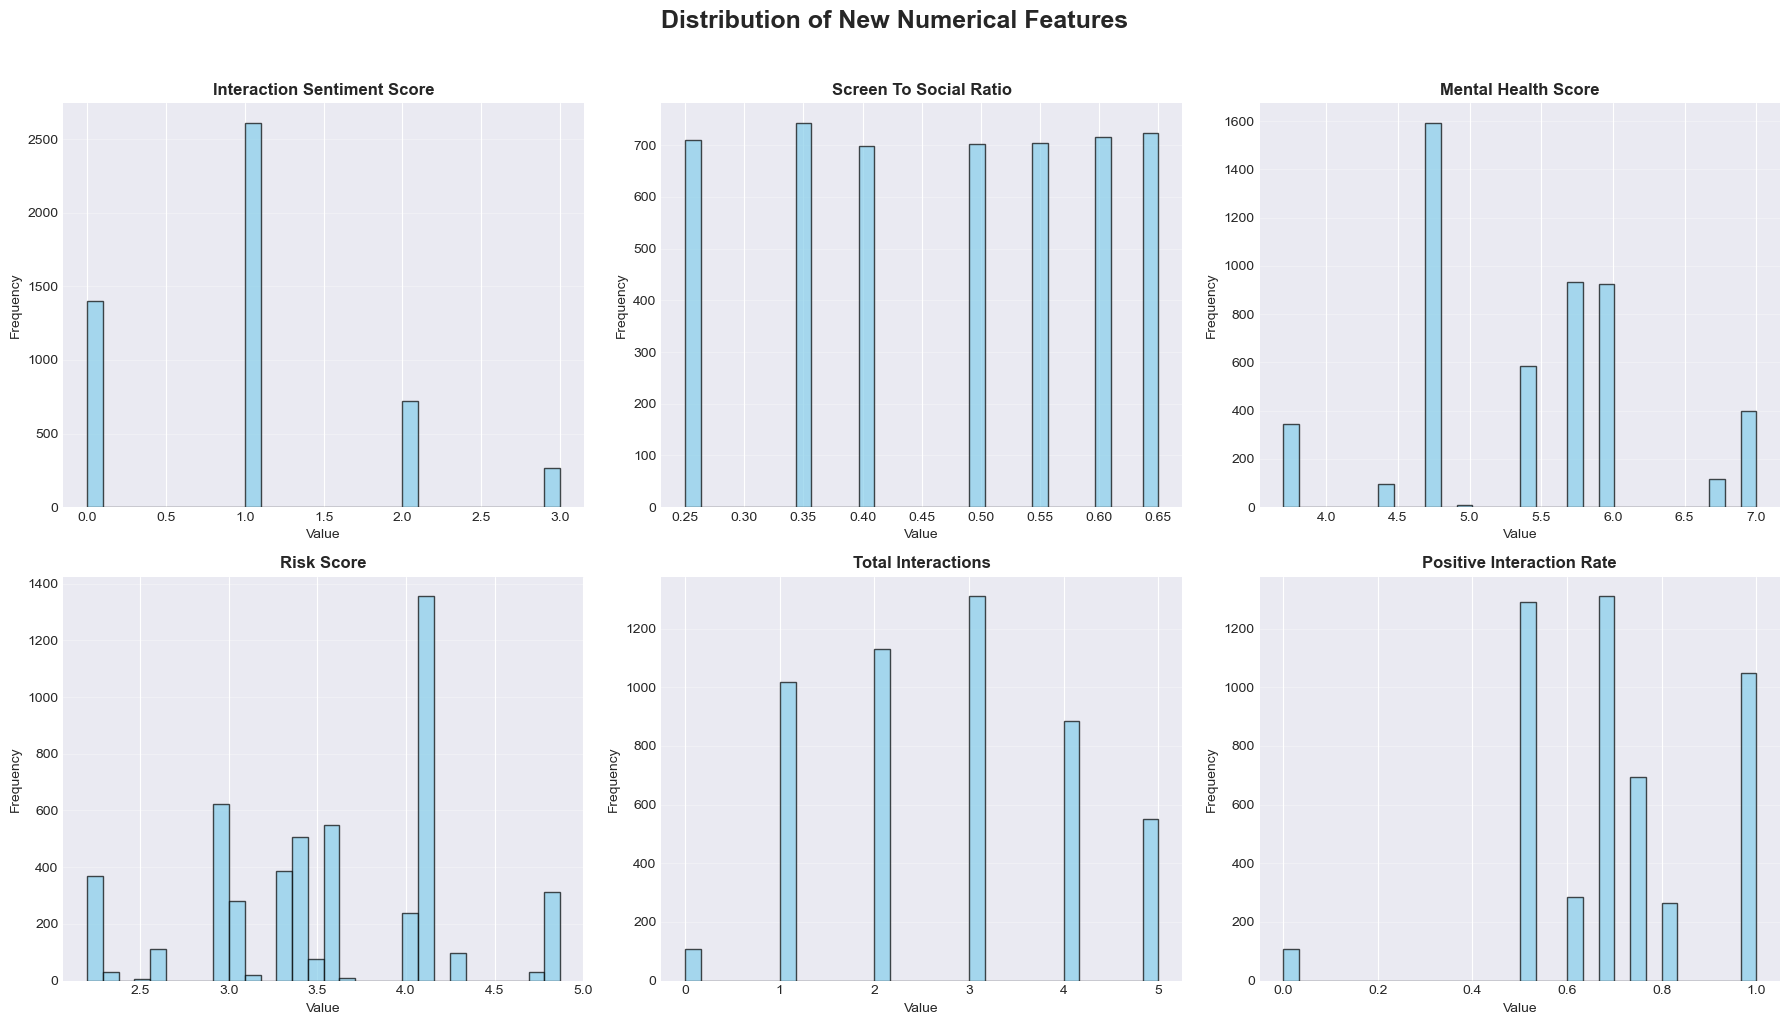

In [44]:
# Visualize distribution of numerical engineered features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of New Numerical Features', fontsize=18, fontweight='bold', y=1.02)

numerical_features = ['interaction_sentiment_score', 'screen_to_social_ratio', 
                      'mental_health_score', 'risk_score', 'total_interactions',
                      'positive_interaction_rate']

for idx, feature in enumerate(numerical_features):
    row = idx // 3
    col = idx % 3
    
    axes[row, col].hist(Social_clean[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'{feature.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Value', fontsize=10)
    axes[row, col].set_ylabel('Frequency', fontsize=10)
    axes[row, col].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

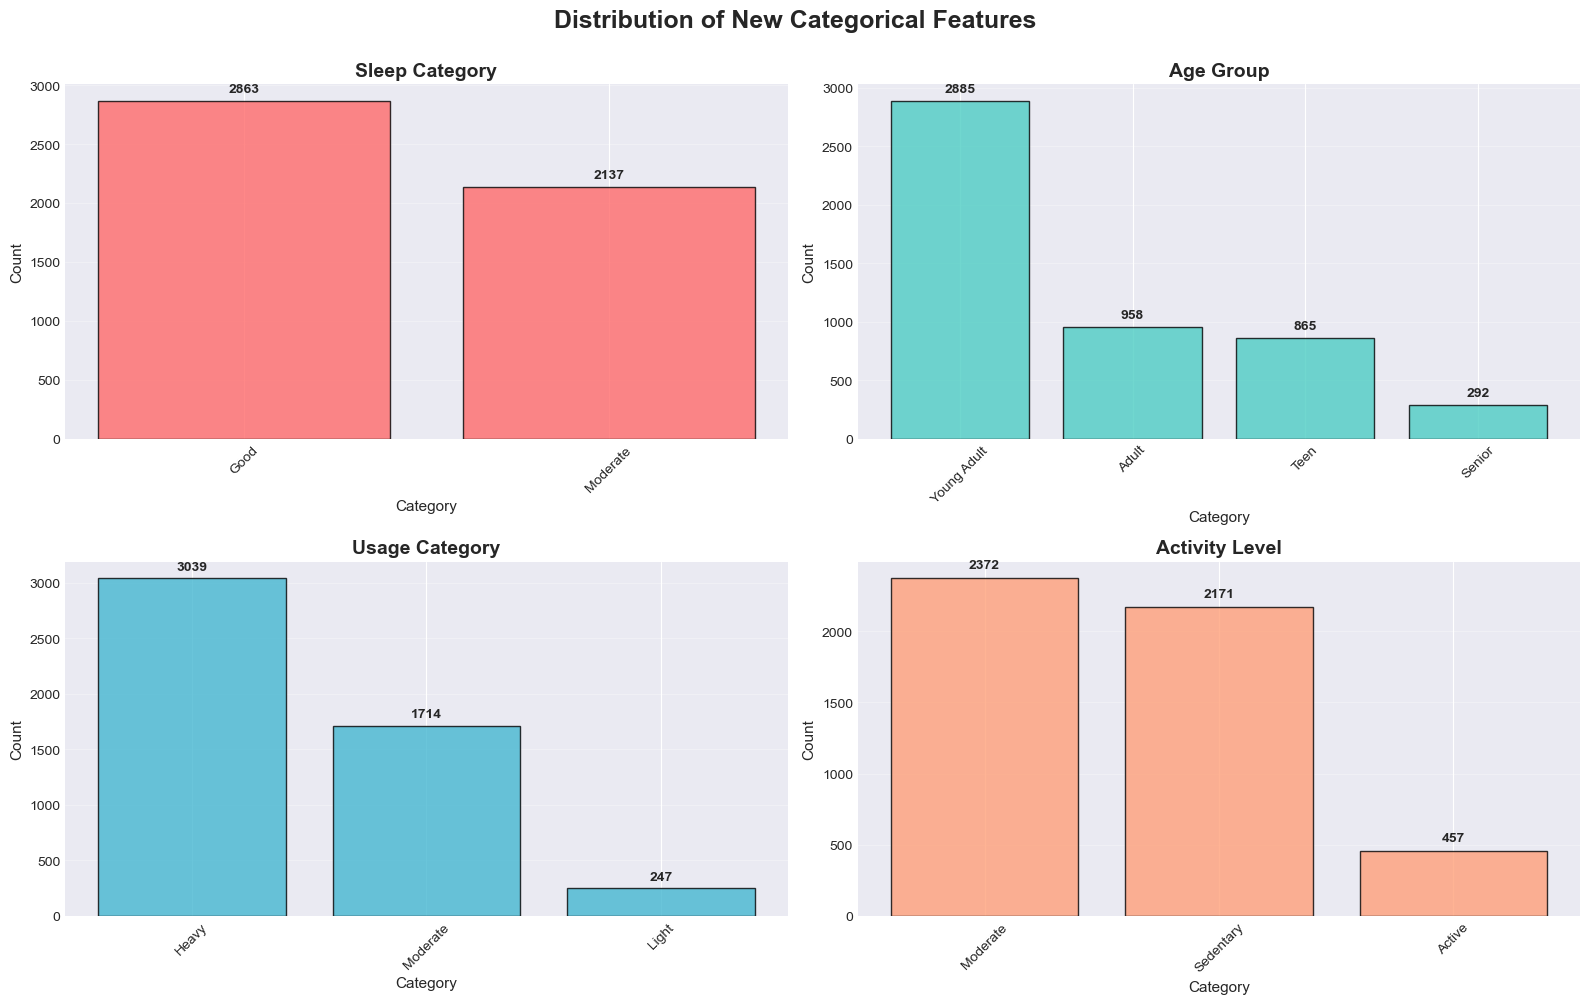

In [45]:
# Visualize categorical engineered features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Distribution of New Categorical Features', fontsize=18, fontweight='bold', y=1.00)

categorical_features = ['sleep_category', 'age_group', 'usage_category', 'activity_level']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, feature in enumerate(categorical_features):
    row = idx // 2
    col = idx % 2
    
    value_counts = Social_clean[feature].value_counts()
    
    axes[row, col].bar(value_counts.index, value_counts.values, color=colors[idx], edgecolor='black', alpha=0.8)
    axes[row, col].set_title(f'{feature.replace("_", " ").title()}', fontsize=14, fontweight='bold')
    axes[row, col].set_xlabel('Category', fontsize=11)
    axes[row, col].set_ylabel('Count', fontsize=11)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[row, col].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Final Dataset Overview

Summary of the cleaned and feature-engineered dataset.

In [46]:
print("=" * 100)
print("FINAL CLEANED DATASET OVERVIEW")
print("=" * 100)

print(f"\n📊 Final Shape: {Social_clean.shape[0]} rows × {Social_clean.shape[1]} columns")
print(f"\n📋 All Columns ({Social_clean.shape[1]} total):")
print("\n🔹 Original Columns (15):")
original_cols = ['person_name', 'age', 'date', 'gender', 'platform', 
                 'daily_screen_time_min', 'social_media_time_min', 
                 'negative_interactions_count', 'positive_interactions_count',
                 'sleep_hours', 'physical_activity_min', 'anxiety_level',
                 'stress_level', 'mood_level', 'mental_state']

for idx, col in enumerate(original_cols, 1):
    print(f"  {idx:2d}. {col}")

print("\n🔹 Engineered Features (10):")
engineered_cols = ['interaction_sentiment_score', 'screen_to_social_ratio',
                   'total_interactions', 'positive_interaction_rate',
                   'sleep_category', 'age_group', 'usage_category',
                   'mental_health_score', 'activity_level', 'risk_score']

for idx, col in enumerate(engineered_cols, 1):
    print(f"  {idx:2d}. {col}")

print(f"\n✅ Data Cleaning and Feature Engineering Complete!")

FINAL CLEANED DATASET OVERVIEW

📊 Final Shape: 5000 rows × 25 columns

📋 All Columns (25 total):

🔹 Original Columns (15):
   1. person_name
   2. age
   3. date
   4. gender
   5. platform
   6. daily_screen_time_min
   7. social_media_time_min
   8. negative_interactions_count
   9. positive_interactions_count
  10. sleep_hours
  11. physical_activity_min
  12. anxiety_level
  13. stress_level
  14. mood_level
  15. mental_state

🔹 Engineered Features (10):
   1. interaction_sentiment_score
   2. screen_to_social_ratio
   3. total_interactions
   4. positive_interaction_rate
   5. sleep_category
   6. age_group
   7. usage_category
   8. mental_health_score
   9. activity_level
  10. risk_score

✅ Data Cleaning and Feature Engineering Complete!


In [47]:
# Final data info
print("=" * 100)
print("FINAL DATASET INFORMATION")
print("=" * 100)
Social_clean.info()

FINAL DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null   int64

In [48]:
# Display a comprehensive sample of the final dataset
print("=" * 100)
print("FINAL DATASET SAMPLE (First 5 Rows)")
print("=" * 100)
Social_clean.head()

FINAL DATASET SAMPLE (First 5 Rows)


,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state,interaction_sentiment_score,screen_to_social_ratio,total_interactions,positive_interaction_rate,sleep_category,age_group,usage_category,mental_health_score,activity_level,risk_score
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.40,28,2,7,6,Stressed,1,0.50,3,0.67,Good,Young Adult,Moderate,5.70,Moderate,3.30
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.70,15,3,8,5,Stressed,2,0.50,4,0.75,Moderate,Young Adult,Heavy,4.70,Sedentary,4.11
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.20,24,3,7,6,Stressed,1,0.55,3,0.67,Good,Young Adult,Moderate,5.40,Moderate,3.58
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.00,41,2,6,6,Stressed,1,0.55,1,1.00,Good,Senior,Moderate,6.00,Active,2.95
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.10,22,3,7,6,Stressed,1,0.55,3,0.67,Good,Young Adult,Heavy,5.40,Moderate,3.60


## 7. Data Quality Check

Final validation to ensure data integrity before saving.

In [49]:
print("=" * 100)
print("FINAL DATA QUALITY CHECK")
print("=" * 100)

# Check 1: Missing Values
missing_final = Social_clean.isnull().sum().sum()
print(f"\n✅ Missing Values: {missing_final}")

# Check 2: Duplicates
duplicates_final = Social_clean.duplicated().sum()
print(f"✅ Duplicate Rows: {duplicates_final}")

# Check 3: Data Types
print(f"\n✅ Data Types Distribution:")
print(Social_clean.dtypes.value_counts())

# Check 4: Value Ranges for Key Metrics
print(f"\n✅ Value Ranges Check:")
print(f"   - Mental Health Score: {Social_clean['mental_health_score'].min():.2f} to {Social_clean['mental_health_score'].max():.2f}")
print(f"   - Risk Score: {Social_clean['risk_score'].min():.2f} to {Social_clean['risk_score'].max():.2f}")
print(f"   - Screen to Social Ratio: {Social_clean['screen_to_social_ratio'].min():.2f} to {Social_clean['screen_to_social_ratio'].max():.2f}")

# Check 5: Categorical Integrity
print(f"\n✅ Categorical Features Integrity:")
for col in ['sleep_category', 'age_group', 'usage_category', 'activity_level']:
    unique_vals = Social_clean[col].nunique()
    print(f"   - {col}: {unique_vals} categories")

print(f"\n🎉 All Quality Checks Passed!")

FINAL DATA QUALITY CHECK

✅ Missing Values: 0
✅ Duplicate Rows: 0

✅ Data Types Distribution:
int64      11
object      9
float64     5
Name: count, dtype: int64

✅ Value Ranges Check:
   - Mental Health Score: 3.70 to 7.00
   - Risk Score: 2.20 to 4.87
   - Screen to Social Ratio: 0.25 to 0.65

✅ Categorical Features Integrity:
   - sleep_category: 2 categories
   - age_group: 4 categories
   - usage_category: 3 categories
   - activity_level: 3 categories

🎉 All Quality Checks Passed!


## 8. Save Cleaned Dataset

Save the final cleaned and feature-engineered dataset for future analysis.

In [50]:
# Save the cleaned dataset
output_filename = 'social_media_mental_health_cleaned.csv'
Social_clean.to_csv(output_filename, index=False)

print("=" * 100)
print("DATASET SAVED SUCCESSFULLY")
print("=" * 100)
print(f"\n✅ Cleaned dataset saved as: '{output_filename}'")
print(f"📊 Total Records: {Social_clean.shape[0]:,}")
print(f"📊 Total Features: {Social_clean.shape[1]}")
print(f"📊 File Size: ~{Social_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\n💾 Dataset successfully exported and ready for Phase 2!")

DATASET SAVED SUCCESSFULLY

✅ Cleaned dataset saved as: 'social_media_mental_health_cleaned.csv'
📊 Total Records: 5,000
📊 Total Features: 25
📊 File Size: ~3.04 MB

💾 Dataset successfully exported and ready for Phase 2!


---

## 📊 Phase 1 Complete Summary

### ✅ What We Accomplished:

**1. Data Loading & Exploration**
   - Loaded dataset with 5,000 records and 15 original features
   - Examined data structure, types, and basic statistics
   - Verified data quality (no missing values, no duplicates)

**2. Data Cleaning**
   - Validated all data ranges
   - Checked for anomalies and outliers
   - Ensured data integrity across all columns

**3. Feature Engineering** 
   Created 10 new powerful features:
   
   **Numerical Features:**
   - `interaction_sentiment_score` - Net sentiment from interactions
   - `screen_to_social_ratio` - Proportion of screen time on social media
   - `total_interactions` - Sum of all interactions
   - `positive_interaction_rate` - Rate of positive interactions
   - `mental_health_score` - Composite mental wellbeing metric
   - `risk_score` - Overall mental health risk indicator
   
   **Categorical Features:**
   - `sleep_category` - Sleep quality classification
   - `age_group` - Demographic age segments
   - `usage_category` - Screen time usage level
   - `activity_level` - Physical activity classification

### 📈 Final Dataset Statistics:
- **Total Records:** 5,000
- **Total Features:** 25 (15 original + 10 engineered)
- **Data Quality:** 100% complete, no missing values
- **File Saved:** `social_media_mental_health_cleaned.csv`

---

### 🚀 Next Steps: Phase 2 - Exploratory Data Analysis (EDA)

We'll dive deep into:
- **Univariate Analysis** - Individual feature distributions
- **Bivariate Analysis** - Relationships between pairs of variables
- **Multivariate Analysis** - Complex patterns and correlations
- **Platform Analysis** - Platform-specific mental health impacts
- **Demographic Insights** - Age and gender patterns
- **Behavioral Patterns** - Usage habits and their effects

**Ready to proceed?** Let's uncover the hidden insights in this data! 🔍

---